Processing file: RemoveDuplicateElements.csv
Processing file: ABCProblem.csv
Processing file: GreatestCommonDivisor.csv
Processing file: LeastCommonMultiple.csv
Processing file: CaesarCipher.csv
Processing file: Factorial.csv
Processing file: FactorsOfAnInteger.csv
Processing file: SieveOfEratosthenes.csv
Processing file: FibonacciSequence.csv


<Figure size 1200x600 with 0 Axes>

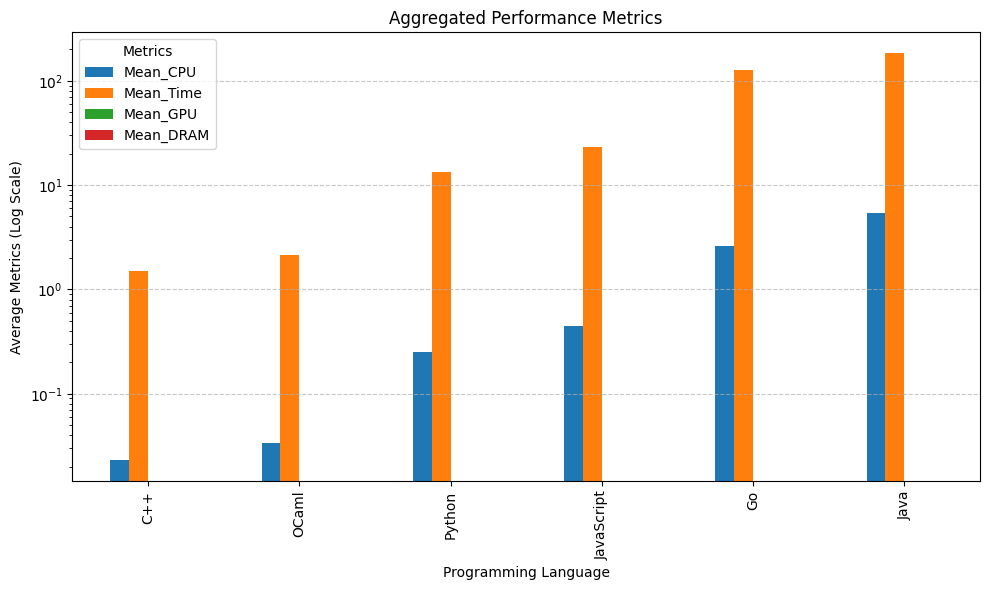


Final Efficiency Analysis:
      Language  Mean_CPU   Std_CPU   Mean_Time    Std_Time  Mean_GPU  Std_GPU  \
0         C++  0.022920  0.005589    1.506356    0.057153       NaN      NaN   
4       OCaml  0.033905  0.037185    2.117333    2.365570       NaN      NaN   
5      Python  0.249021  0.091205   13.220933    1.623774       NaN      NaN   
3  JavaScript  0.447123  0.094199   23.093122    0.584605       NaN      NaN   
1          Go  2.630912  7.828378  126.172756  374.464599       NaN      NaN   
2        Java  5.437164  1.894367  185.639644   58.052497       NaN      NaN   

   Mean_DRAM  Std_DRAM  Overall_Rank  
0        NaN       NaN           1.0  
4        NaN       NaN           2.0  
5        NaN       NaN           3.0  
3        NaN       NaN           4.0  
1        NaN       NaN           5.0  
2        NaN       NaN           6.0  


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing the results
folder_path = "./results"
output_folder = "./output_graphs"  # Folder to save graphs

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Initialize a DataFrame to collect aggregate results
aggregate_results = pd.DataFrame()

# Function to process a single file
def process_file(file_path, file_name):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Generate and save the individual file graph
    df.plot(kind='bar', x='Language', y=['CPU', 'Time', 'GPU', 'DRAM'], figsize=(10, 6), logy=True)
    plt.title(f'Performance Metrics ({file_name})')
    plt.ylabel('Metrics')
    plt.xlabel('Programming Language')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title="Metrics")
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f"{file_name}_metrics.png"))
    plt.close()  # Close the plot to avoid overlap
    
    return df

# Process each CSV file
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        print(f"Processing file: {file_name}")
        
        # Process the file and get the DataFrame
        df = process_file(file_path, file_name)
        
        # Add to aggregate results
        if aggregate_results.empty:
            aggregate_results = df.copy()
        else:
            aggregate_results = pd.concat([aggregate_results, df], axis=0)

# Aggregate Data
agg_metrics = aggregate_results.groupby('Language').agg(
    Mean_CPU=('CPU', 'mean'),
    Std_CPU=('CPU', 'std'),
    Mean_Time=('Time', 'mean'),
    Std_Time=('Time', 'std'),
    Mean_GPU=('GPU', 'mean'),
    Std_GPU=('GPU', 'std'),
    Mean_DRAM=('DRAM', 'mean'),
    Std_DRAM=('DRAM', 'std')
).reset_index()

# Ranking
agg_metrics["CPU_Rank"] = agg_metrics["Mean_CPU"].rank()
agg_metrics["Time_Rank"] = agg_metrics["Mean_Time"].rank()
agg_metrics["Overall_Rank"] = agg_metrics[["CPU_Rank", "Time_Rank"]].mean(axis=1)

# Sort by Overall Rank
agg_metrics = agg_metrics.sort_values("Overall_Rank")

# Visualize aggregated results
plt.figure(figsize=(12, 6))
agg_metrics.plot(kind='bar', x='Language', y=["Mean_CPU", "Mean_Time", "Mean_GPU", "Mean_DRAM"], figsize=(10, 6), logy=True)
plt.title('Aggregated Performance Metrics')
plt.ylabel('Average Metrics (Log Scale)')
plt.xlabel('Programming Language')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metrics")
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "aggregated_metrics.png"))
plt.show()

# Print Final Results
print("\nFinal Efficiency Analysis:\n", agg_metrics[[
    "Language", "Mean_CPU", "Std_CPU", "Mean_Time", "Std_Time", "Mean_GPU", "Std_GPU", "Mean_DRAM", "Std_DRAM", "Overall_Rank"
]])
